In [2]:
import os
import sys
from dotenv import load_dotenv
import importlib

# 환경 변수 로드
load_dotenv()

# 프로젝트 루트 디렉토리를 Python 경로에 추가
project_root = os.path.dirname(os.path.dirname(os.path.abspath(os.getcwd())))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

# 개발 중 수정사항 반영을 위한 모듈 리로드 (모든 노드 포함)
modules_to_reload = [
    'graph.nodes.classifier',
    'graph.nodes.medical_check',
    'graph.nodes.retrieval',
    'graph.nodes.rewrite_query',
    'graph.nodes.generate_answer',
    'graph.nodes.web_search',
    'graph.nodes.evaluate_chunk',
    'graph.compile',
    'rag.services.retriever'
]
for module_name in modules_to_reload:
    if module_name in sys.modules:
        importlib.reload(sys.modules[module_name])

print("✅ 환경 설정 완료")


# 환경 변수 확인
def check_environment():
    """환경 변수 및 DB 연결 정보 확인"""
    print("\n=== DB 연결 정보 ===")
    print(f"POSTGRES_HOST: {os.getenv('POSTGRES_HOST')}")
    print(f"POSTGRES_PORT: {os.getenv('POSTGRES_PORT')}")
    print(f"POSTGRES_DB: {os.getenv('POSTGRES_DB')}")
    print(f"POSTGRES_USER: {os.getenv('POSTGRES_USER')}")
    print(f"OPENAI_API_KEY: {'✅ 설정됨' if os.getenv('OPENAI_API_KEY') else '❌ 미설정'}\n")

check_environment()


# Workflow 초기화
from graph.compile import create_medical_rag_workflow

# retrieval 노드가 내부적으로 VectorRetriever를 사용하므로
# vectorstore를 외부에서 전달할 필요가 없습니다
medical_app = create_medical_rag_workflow()
print("✅ Medical RAG 워크플로우 생성 완료!")

KeyboardInterrupt: 

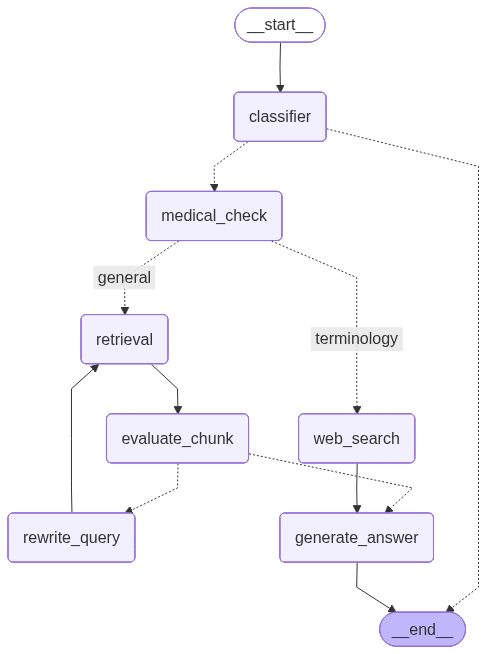

✅ 워크플로우 그래프 표시 완료


In [ ]:
from IPython.display import Image, display

# 워크플로우 그래프 시각화
try:
    display(Image(medical_app.get_graph().draw_mermaid_png()))
    print("✅ 워크플로우 그래프 표시 완료")
except Exception as e:
    print(f"❌ 그래프 표시 오류: {e}")

In [ ]:
def print_section_header(title):
    """섹션 헤더 출력"""
    print(f"\n{'='*60}")
    print(f" {title}")
    print(f"{'='*60}")

def print_test_result(question, result, test_number):
    """테스트 결과 출력"""
    print_section_header(f"테스트 {test_number}")
    print(f"질문: {question}\n")
    print(f"답변:\n{result.get('final_answer', '답변 없음')}\n")
    
    # 디버깅 정보
    print(f"{'─'*60}")
    print("📊 워크플로우 디버깅 정보:")
    print(f"  • 의학 질문 여부: {'✅ 예' if not result.get('need_quit', False) else '❌ 아니오'}")
    print(f"  • 용어 질문 여부: {'✅ 예' if result.get('is_terminology', False) else '❌ 아니오'}")
    print(f"  • 검색 문서 수: {len(result.get('retrieved_docs', []))}개")
    print(f"  • 문서 관련성: {'✅ 관련있음' if result.get('is_relevant', False) else '❌ 관련없음'}")
    print(f"  • 쿼리 재작성 횟수: {result.get('rewrite_count', 0)}회")

def run_workflow_tests(test_questions):
    """워크플로우 테스트 실행"""
    print_section_header("워크플로우 테스트 시작")
    
    for i, question in enumerate(test_questions, 1):
        try:
            print(f"\n{'─'*60}")
            print(f"🔄 질문 {i}: {question}")
            print(f"{'─'*60}\n")
            
            # invoke를 사용하면 print 로그가 자동으로 출력됨
            result = medical_app.invoke({"question": question})
            
            print_test_result(question, result, i)
        except Exception as e:
            print(f"\n❌ 테스트 {i} 실행 오류: {e}")
    
    print_section_header("테스트 완료!")


# 테스트 질문 정의
test_questions = [
    "대장암 치료 방법은 무엇인가요?",
    "항암화학요법의 부작용은?",
]

# 테스트 실행
run_workflow_tests(test_questions)


 워크플로우 테스트 시작

────────────────────────────────────────────────────────────
🔄 질문 1: 대장암 치료 방법은 무엇인가요?
────────────────────────────────────────────────────────────

• [Classifier] start (question="대장암 치료 방법은 무엇인가요?...")
• [Classifier] complete (need_quit=False)
• [MedicalCheck] start (question="대장암 치료 방법은 무엇인가요?...")
• [MedicalCheck] complete (is_terminology=False)
• [Retrieve] start (top_k=5, query="대장암 치료 방법은 무엇인가요?...")
• [Retrieve] complete (fetched=5 docs)
• [EvaluateChunk] start (query="대장암 치료 방법은 무엇인가요?...", context_chars=593)
• [EvaluateChunk] complete (is_relevant=True, score=0.8)
• [Generate] start (context_chars=593, is_terminology=False)
• [Generate] complete (answer_chars=884)

 테스트 1
질문: 대장암 치료 방법은 무엇인가요?

답변:
1. 핵심 답변
- 대장암 치료의 기본 원칙은 근치적 절제수술이며, 병기에 따라 추가 치료가 결정됩니다. 수술 후에는 병리학적 진단으로 최종 병기를 확정하고 필요 시 보조 항암화학요법을 시행합니다. 최근에는 내시경적 점막절제술이나 점막하 박리술도 시행되며, 치료 성적은 기전 이해, 조기 진단, 영상‧병리 진단의 발전, 수술 기술의 정교화, 방사선 및 항암화학요법의 발전으로 높아지고 있습니다. [문서 1][문서 2][문서 3][문서 4][문서 5]

2. 상세 설명
- 기본

## *_i.py 파일 구현 랭그래프

SelfRAGState 클래스 정의 완료!
✅ 환경 설정 완료 (*_i.py 버전)
✅ Medical RAG 워크플로우 (*_i.py 버전) 생성 완료!


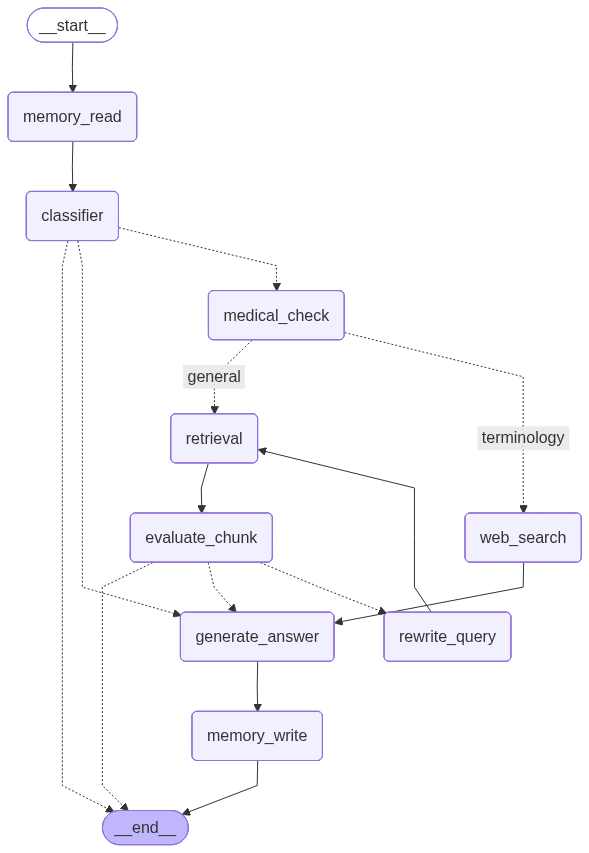

✅ 워크플로우 그래프 표시 완료


In [5]:
import os
import sys
from dotenv import load_dotenv
import importlib
from IPython.display import Image, display

# 환경 변수 로드
load_dotenv()

# 프로젝트 루트 디렉토리를 Python 경로에 추가
project_root = os.path.dirname(os.path.dirname(os.path.abspath(os.getcwd())))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

# 개발 중 수정사항 반영을 위한 모듈 리로드 (*_i.py 버전)
modules_to_reload = [
    'graph.state_i',  # 새로운 State 정의
    'graph.nodes.classifier_i',  # conversation_type 기반 분류
    'graph.nodes.memory_i',  # List[Dict] 형식 conversation_history
    'graph.nodes.generate_answer_i',  # conversation_type 기반 답변 생성
    'graph.nodes.medical_check',
    'graph.nodes.retrieval',
    'graph.nodes.rewrite_query',
    'graph.nodes.web_search',
    'graph.nodes.evaluate_chunk',
    'graph.compile_i',  # conversation_type 기반 라우팅
    'rag.services.retriever'
]
for module_name in modules_to_reload:
    if module_name in sys.modules:
        importlib.reload(sys.modules[module_name])

print("✅ 환경 설정 완료 (*_i.py 버전)")

# 워크플로우 생성
from graph.compile_i import create_medical_rag_workflow
medical_app_i = create_medical_rag_workflow()
print("✅ Medical RAG 워크플로우 (*_i.py 버전) 생성 완료!")

# 워크플로우 그래프 시각화
try:
    display(Image(medical_app_i.get_graph().draw_mermaid_png()))
    print("✅ 워크플로우 그래프 표시 완료")
except Exception as e:
    print(f"❌ 그래프 표시 오류: {e}")